In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [4]:
dataset = pd.read_csv('F:/Innovation_Lab/PYTHON/HEXAWARE_Train_2002-2007.csv',index_col="Date",parse_dates=True)


In [35]:
dataset.head()


,Open,High,Low,Close,Adj Close,Volume,Close: 30 Day Mean
Date,,,,,,,
2002-07-01,3.3900,3.4450,3.3325,3.3650,1.508718,39134.0,NaN
2002-07-02,3.3100,3.3425,3.2250,3.2575,1.460520,41330.0,NaN
2002-07-03,3.2550,3.4000,3.2550,3.3800,1.515444,81812.0,NaN
2002-07-04,3.4000,3.5250,3.3050,3.3400,1.497510,101884.0,NaN
2002-07-05,3.3975,3.3975,3.2650,3.2825,1.471729,32594.0,NaN


In [6]:
dataset.isna().any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [36]:
dataset = dataset.replace(to_replace='null', value=np.nan).dropna()

In [37]:
dataset.isna().any()

Open                  False
High                  False
Low                   False
Close                 False
Adj Close             False
Volume                False
Close: 30 Day Mean    False
dtype: bool

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 716 entries, 2002-08-09 to 2007-06-29
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                716 non-null    float64
 1   High                716 non-null    float64
 2   Low                 716 non-null    float64
 3   Close               716 non-null    float64
 4   Adj Close           716 non-null    float64
 5   Volume              716 non-null    float64
 6   Close: 30 Day Mean  716 non-null    float64
dtypes: float64(7)
memory usage: 44.8 KB


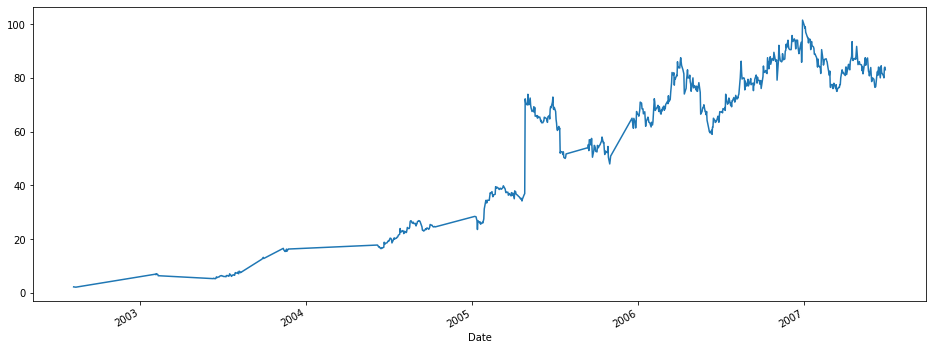

In [39]:
dataset['Open'].plot(figsize=(16,6))

In [40]:
# convert column "a" of a DataFrame
#dataset["Close"] = dataset["Close"].str.replace(',', '').astype(float)


In [41]:
#dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)

In [42]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume,Close: 30 Day Mean
Date,,,,,,,
2002-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-08-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-08-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-02-07,4.270000,4.339643,4.136429,4.229643,1.896386,6.619359e+06,4.377000
2003-02-10,4.927857,4.998214,4.726071,4.826429,2.163959,9.383614e+06,4.956881
2003-02-11,5.531429,5.621786,5.308929,5.416786,2.428649,1.244035e+07,5.544619


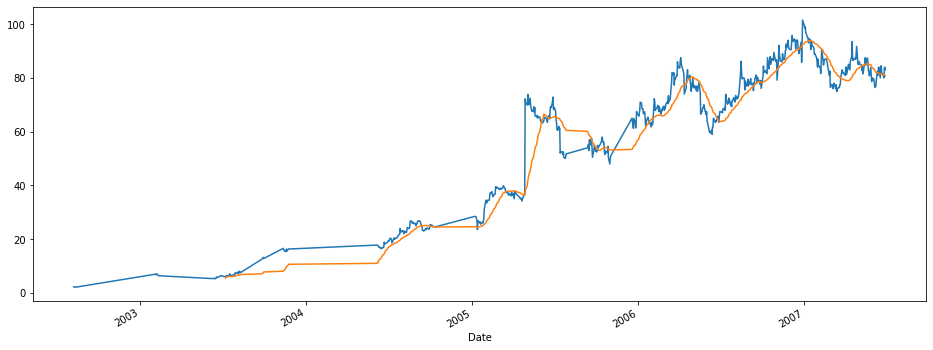

In [43]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

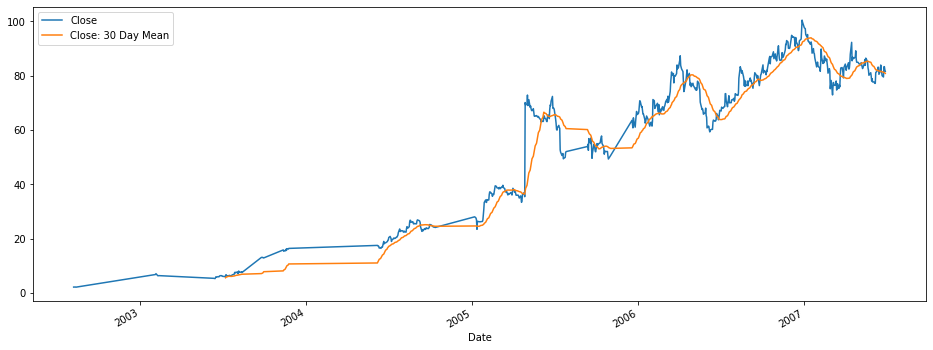

In [44]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

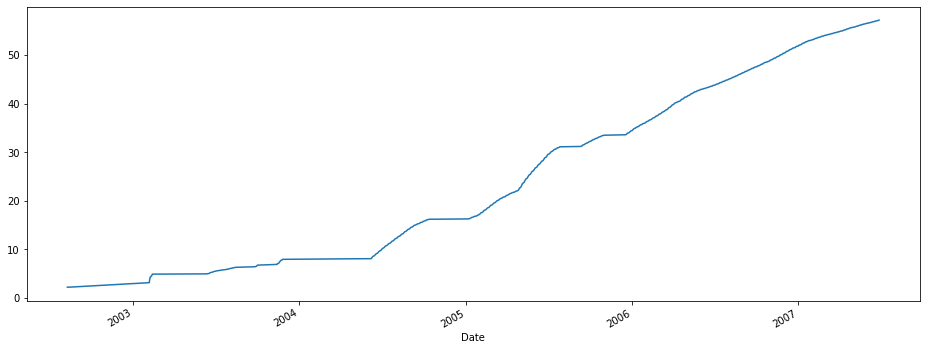

In [45]:
# Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [46]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)


In [47]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [49]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 716):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [50]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



In [51]:
# Initialising the RNN
regressor = Sequential()



In [52]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [53]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 70, batch_size = 32)


Epoch 1/70
656/656 [==============================] - 7s 11ms/step - loss: 0.0995
Epoch 2/70
656/656 [==============================] - 4s 7ms/step - loss: 0.0172
Epoch 3/70
656/656 [==============================] - 4s 6ms/step - loss: 0.0112A: 3s - ETA: 0s - loss: 0.01
Epoch 4/70
656/656 [==============================] - 4s 6ms/step - loss: 0.0085
Epoch 5/70
656/656 [==============================] - 4s 6ms/step - loss: 0.0082
Epoch 6/70
656/656 [==============================] - 4s 7ms/step - loss: 0.0078
Epoch 7/70
656/656 [==============================] - 4s 7ms/step - loss: 0.0081
Epoch 8/70
656/656 [==============================] - 4s 7ms/step - loss: 0.0080
Epoch 9/70
656/656 [==============================] - 5s 8ms/step - loss: 0.0078
Epoch 10/70
656/656 [==============================] - 5s 7ms/step - loss: 0.0073
Epoch 11/70
656/656 [==============================] - 5s 7ms/step - loss: 0.0068
Epoch 12/70
656/656 [==============================] - 5s 7ms/step - loss: 0.0

In [82]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('F:/Innovation_Lab/PYTHON/HEXAWARE_Test_2007-2009.csv',index_col="Date",parse_dates=True)



In [83]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [84]:
dataset_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-07-03,81.275002,84.175003,81.275002,83.949997,51.313175,228990
2007-07-04,83.974998,84.275002,82.724998,83.224998,50.870060,171064
2007-07-05,83.000000,83.849998,81.500000,83.500000,51.038147,453288
2007-07-06,83.824997,83.875000,82.250000,83.550003,51.068718,315308
2007-07-09,84.599998,84.599998,83.250000,83.525002,51.053429,73382


In [85]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 491 entries, 2007-07-03 to 2009-07-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       491 non-null    float64
 1   High       491 non-null    float64
 2   Low        491 non-null    float64
 3   Close      491 non-null    float64
 4   Adj Close  491 non-null    float64
 5   Volume     491 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.9 KB


In [86]:
dataset_test = dataset_test.replace(to_replace='null', value=np.nan).dropna()

In [87]:
#dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

In [88]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [89]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 491 entries, 2007-07-03 to 2009-07-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    491 non-null    float64
dtypes: float64(1)
memory usage: 7.7 KB


In [90]:
# Getting the predicted stock price of 2007-2009
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 550):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [91]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       490 non-null    float32
dtypes: float32(1)
memory usage: 2.0 KB


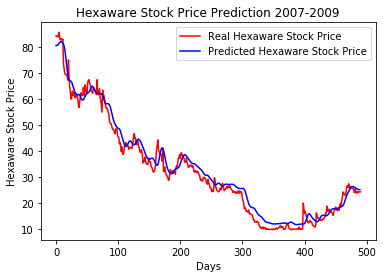

In [93]:

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Hexaware Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Hexaware Stock Price')
plt.title('Hexaware Stock Price Prediction 2007-2009')
plt.xlabel('Days')
plt.ylabel('Hexaware Stock Price')
plt.legend()
plt.show()
